In [ ]:
# importing required packages

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import time
%matplotlib inline

# importing CSV

url = 'https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/reactionTime.csv'
df = pd.read_csv(url)

df.head()

,age,boredom_rating,risk_propensity,height,left_handed,reaction_time
0,34,78.87,10.53,146.79,0,900.949930
1,38,4.84,14.64,169.44,0,900.668926
2,38,23.52,14.17,167.76,1,901.703988
3,27,45.65,15.98,171.15,0,899.406904
4,34,0.88,10.58,158.15,0,899.728326


### A.

In [ ]:
# 80/20 test train split for model validation with z-score of continuous/interval variables

all_variables = ['age', 'boredom_rating', 'risk_propensity', 'left_handed', 'height']
predictors = ['age', 'boredom_rating', 'risk_propensity', 'height']

X_train, X_test, y_train, y_test = train_test_split(df[predictors], df["reaction_time"], test_size=0.2)

z = StandardScaler()
X_train[predictors] = z.fit_transform(X_train[predictors])
X_test[predictors] = z.transform(X_test[predictors])

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


### B.

In [ ]:
# scatterplots for continuous variables

agePlot = (ggplot(df, aes(x = 'age', y = 'reaction_time')) + geom_point() + theme_bw() + 
          ggtitle('Evaluation of Linearity Between Age and Reaction Time') + labs(x = 'Age', y = 'Reaction Time') + theme_minimal())

brPlot = (ggplot(df, aes(x = 'boredom_rating', y = 'reaction_time')) + geom_point() + theme_bw() + 
          ggtitle('Evaluation of Linearity Between Boredom Rating and Reaction Time') + labs(x = 'Boredom Rating', y = 'Reaction Time') + theme_minimal())

rpPlot = (ggplot(df, aes(x = 'risk_propensity', y = 'reaction_time')) + geom_point() + theme_bw() + 
          ggtitle('Evaluation of Linearity Between Risk Propensity and Reaction Time') + labs(x = 'Risk Propensity', y = 'Reaction Time') + theme_minimal())

hPlot = (ggplot(df, aes(x = 'height', y = 'reaction_time')) + geom_point() + theme_bw() + 
          ggtitle('Evaluation of Linearity Between Height and Reaction Time') + labs(x = 'Height', y = 'Reaction Time') + theme_minimal())


### B) **Discuss in detail what you are checking for and specifically what you see for this model regardless of the results.**
The linear assumption, a parameter of linear regression dictates that the relationship between the indepedent variable (x) and the dependent variable is **linear**. Verifying this can be achieved by employing a scatter plot and subsequently analyzing it. If the resulting scatter plot corresponds with a linear pattern, one can determine if the linearity assumption is met. Below are the evaluation of linearity for each continuous variable with reaction time.


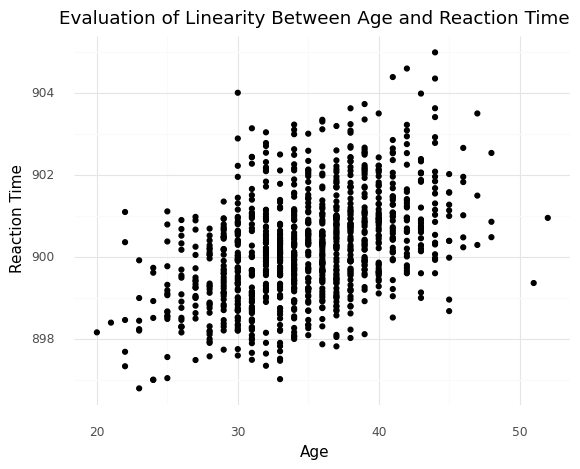

<ggplot: (8791871057549)>

In [ ]:
# Scatter plot for Reaction Time versus Age
agePlot

***Figure 1a: Evaluation of Linearity Between Age and Reaction Time***

When employing *ggplot* to create a scatterplot showing the relationship between 'Age' and 'Reaction Time', we see that there is a **weak relationship and that it is linear**. We can see that in general, as age increases, so does the reaction time. However, because of the spread, we cannot say that it is strong. There is a weak, positive correlation between the two variables (line of best fit would have a positive slope).

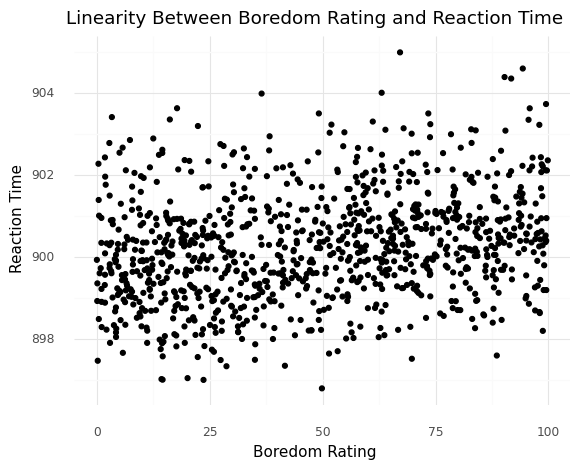

<ggplot: (8791870658201)>

In [ ]:
# Scatter plot for Reaction Time versus Boredom Rating
brPlot

***Figure 1b: Evaluation of Linearity Between Boredom Rating and Reaction Time***

When employing *ggplot* to create a scatterplot showing the relationship between 'Boredom Rating' and 'Reaction Time', we see that there is a **no relationship and that it is linear**. We can see that there is no signficant relationship betwen the boredom rating and reaction time due to the generally even spread. There is no clear relationship between the two, but that it is linear (we can still draw a line of best fit that meets this criteron).

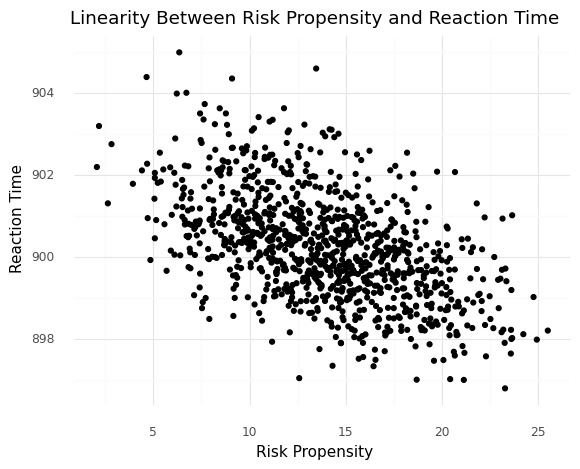

<ggplot: (8791870713933)>

In [ ]:
# Scatter plot for Reaction Time versus Risk Propensity
rpPlot

***Figure 1c: Evaluation of Linearity Between Risk Propensity and Reaction Time***

When employing *ggplot* to create a scatterplot showing the relationship between 'Risk Propensity' and 'Reaction Time', we see that there is a **weak relationship and that it is linear**. We can see that in general, as risk propensity increases, the reaction time decreases. However, because of the spread, we cannot say that it is strong. There is a weak, negative correlation between the two variables (line of best fit would have a negative slope).

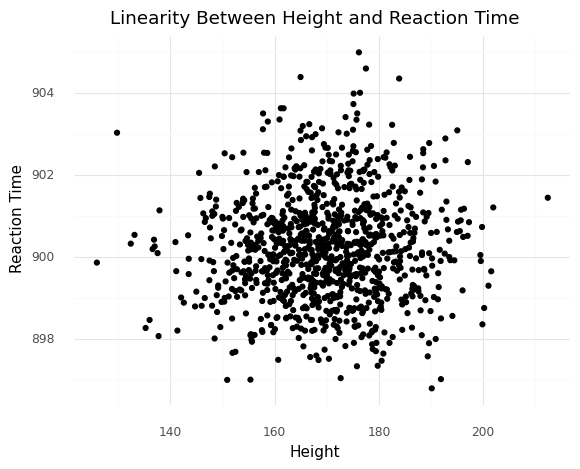

<ggplot: (8791871003721)>

In [ ]:
# Scatter plot between Reaction Time and Height
hPlot

***Figure 1d: Evaluation of Linearity Between Height Propensity and Reaction Time***

When employing *ggplot* to create a scatterplot showing the relationship between 'Height' and 'Reaction Time', we see that there is a **no relationship and that it is linear**. We can see that there is no clear correlation between an individual's height and reaction time because of the spread. Even though there is no correlation, it is still linear (we can still draw a line of best fit that meets this criteron).

### C.

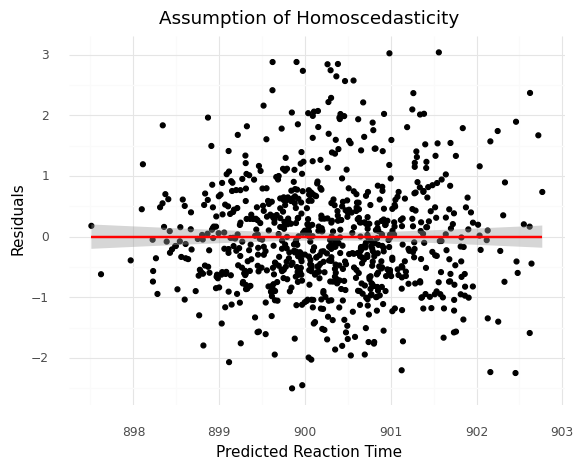

<ggplot: (8791870054905)>

In [ ]:
# checking assumption of homoscedasticity by plotting predicted reaction times and residuals

X = X_train
y = y_train

z = StandardScaler()
z.fit(X)
Xz = z.transform(X)

LR_Model = LinearRegression()
LR_Model.fit(Xz, y)
pred = LR_Model.predict(Xz)

# making residual plot
assumption = pd.DataFrame({'Residuals': y - pred, 'Predicted Reaction Time': pred})

# scatterplot
(ggplot(assumption, aes(x = 'Predicted Reaction Time', y = 'Residuals')) + geom_point() + theme_bw() +
 geom_smooth(method = 'lm', color = 'red') + labs(title = 'Assumption of Homoscedasticity') + theme_minimal())


### C) Discuss in detail what you are checking for and what patterns you see specifically for this model.

***Figure 2: Evaluating Homoscedasticity***

Another assumption in linear regression revolves around the idea of homoscedasticity, or the assumption of similar variances between different groups that are being compared. Homoscedasticity is an important because they are sensitive to any dissimilarities. It answers the question: is the mode worse in certain areas than others? We are checking to see if the data points are equally scattered or not. If they are roughly equal, it would satisfy the assumption of homoscedasticity. A plot that resembles a funnel would not fit homoscedasticity.

When employing z-scores and utilizing *ggplot* to create the scatter plot comparing the residuals to the predicted reaction time, we see that our dataset **aligns with the assumption of homoscedasticity** because the data points are generally equally spread out.

### D.

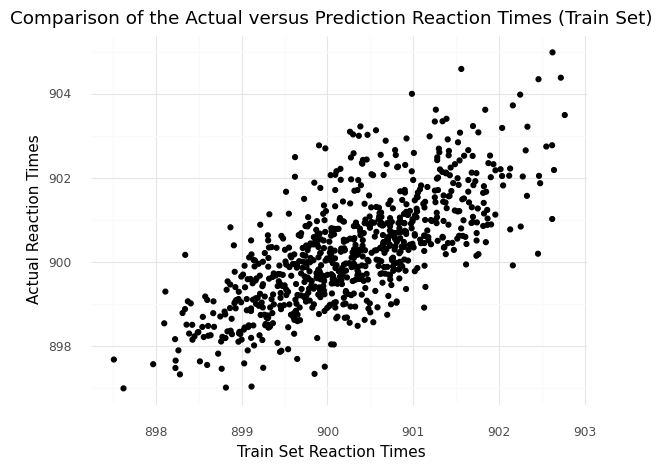

<ggplot: (8791870702457)>


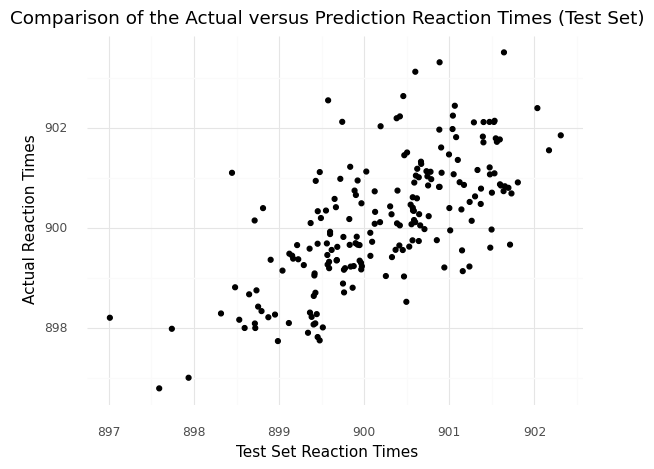

<ggplot: (8791870740613)>
The mean absolute error for the train set is:  0.7131570678420546
The mean absolute error for the test set is:  0.7325154757728797
The R2 for the train set is:  0.5046139682183672
The R2 for the test set is:  0.45386265569753614


In [ ]:
actual = df['reaction_time']
train = lr.predict(X_train)
test = lr.predict(X_test)

df1 = pd.DataFrame({'actual': y_train, 'train': train})
df2 = pd.DataFrame({'actual': y_test, 'test': test})

# actual vs predicted reaction times for the train set
actualVsPredTrain = (ggplot(df1, aes(x = 'train', y = 'actual')) + geom_point() + theme_bw() + 
 ggtitle('Comparison of the Actual versus Prediction Reaction Times (Train Set)') + 
 labs(x = 'Train Set Reaction Times', y = 'Actual Reaction Times') + theme_minimal())

# actual vs predicted reaction times for the test set
actualVsPredTest = (ggplot(df2, aes(x = 'test', y = 'actual')) + geom_point() + theme_bw() + 
 ggtitle('Comparison of the Actual versus Prediction Reaction Times (Test Set)') + 
 labs(x = 'Test Set Reaction Times', y = 'Actual Reaction Times') + theme_minimal())

# printing out scatterplots
print(actualVsPredTrain)
print(actualVsPredTest)

# printing out MAE and R2

print('The mean absolute error for the train set is: ', mean_absolute_error(y_train, train))
print('The mean absolute error for the test set is: ', mean_absolute_error(y_test, test))
print('The R2 for the train set is: ', r2_score(y_train, train))
print('The R2 for the test set is: ', r2_score(y_test, test))


### D) Discuss how well your model did based on these metrics, and how can you tell.

When examing the scatterplots of the actual reaction times versus the reaction times of the test/train sets, we see that they are rougly similar in both in nature. They both have a relatively weak and linear relationship. The scatterplot shows us that our model performed well. However, simply eyeballing the plots is not enough. Therefore, the mean absolute error (MAE) and R-squared (R2) values were obtained for both.

The mean absolute error of the train set was approximately 0.71. We can interpret this as that on average, the predicted value's distance from the true value was approximately 0.71. Similarly, the mean absolute error of the test set was approximately 0.73, suggesting that the predicted value's distance from the true value (reaction time) was approximately 0.73. The R2 value measures the proportion of the variance between two variables (i.e. correlation). The R2 value was the training set was approximately 0.50, which means that half of the variance in our resulting data can be explained by the model. The R2 value in the test set was approximately 0.45, suggesting less than half of the variance in our resulting data can be explained by our model.

Our evaluation of our models showed us that the MAE of the train set was lower than that of the test set, which can be justified by the relatively high number of data points. Our R2 value also showed that our train set had more variance could be explained by the model. When interpreting both values in greater context, it suggests that our models are not very strong and did not perform exceptionally well.



### E. Is your model overfit? Discuss in detail how you can tell

Overfitting by definition means that our model performed well on the training set and poor on the test set. I do not think that our model was overfit. We can reflect back on our mean absolute error and R-squared values. The difference between our MAE between the train and test set was 0.02 while the R2 value differed by 0.05. While our test set had higher a MAE value and a lower R2 value, the difference in the values is not significant enough to warrant classifying our model as 'overfit.' They performed (in general) about the same on the train set and the test set.


### F.

       Coef             Name
0  0.571965              age
1  0.268315   boredom_rating
2 -0.653844  risk_propensity
3  0.051198           height


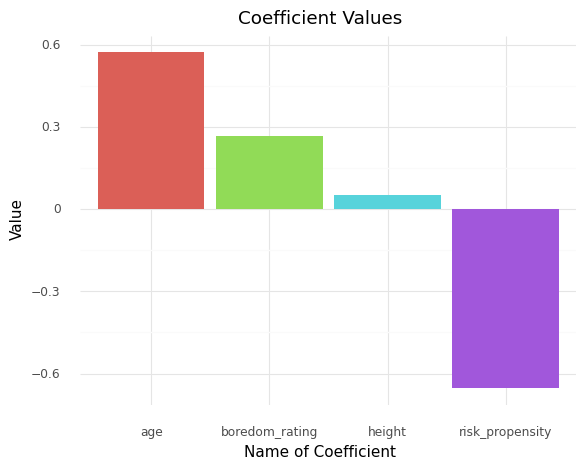

<ggplot: (8791870906697)>

In [ ]:
# use ggplot to make a bar chart showing the coefficient values (x should be each coef name, the height of each bar 
# should be the value of the coefficient). DO NOT include the intercept in this plot. Briefly discuss the impact of each 
# variable on reaction time.

coefficients = pd.DataFrame({'Coef': LR_Model.coef_, 'Name': predictors})

print(coefficients)

(ggplot(coefficients, aes(x = 'Name', y = 'Coef', fill = 'Name')) + geom_bar(stat = 'identity') + 
 theme_bw() + ggtitle('Coefficient Values') + labs(x = 'Name of Coefficient', y = 'Value') + 
 theme_minimal() + theme(legend_position = 'none'))


### F) Briefly discuss the impact of each variable on reaction time.


*   The coefficient of age is ~0.57. This indicates that as the reaction time increases by 1, we expect the age to increase by ~0.57.
*   The coefficient of boredom rating is ~0.27. This indicates that as the reaction time increases by 1, we expect the boredom rating to increase by ~0.27.
*   The coefficient of risk propensity is ~0.65. This indicates that as the reaction time increases by 1, we expect the risk propensity to decrease by ~0.65.
*   The coefficient of risk propensity is ~0.05. This indicates that as the reaction time increases by 1, we expect the height to increase by ~0.05.